# ROMY & FUR - Overview

## Load Libraries

In [1]:
import os, sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

from obspy import UTCDateTime, read_inventory
from scipy.signal import welch
from pandas import read_pickle, DataFrame, concat

from functions.get_time_intervals import __get_time_intervals
from functions.load_bathymetry import __load_bathymetry

In [2]:
import sys
sys.path.append('..')

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [4]:
config = {}

# test 2
# config['tbeg'] = UTCDateTime("2024-02-01")
# config['tend'] = UTCDateTime("2024-03-15")

# test 3 - longterm
# config['tbeg'] = UTCDateTime("2023-09-23")
# config['tend'] = UTCDateTime("2024-05-31")

# moving event
# config['tbeg'] = UTCDateTime("2024-03-01")
# config['tend'] = UTCDateTime("2024-03-03")

# moving event
# config['tbeg'] = UTCDateTime("2024-02-20")
# config['tend'] = UTCDateTime("2024-03-01")

# september data
config['tbeg'] = UTCDateTime("2024-02-01")
config['tend'] = UTCDateTime("2024-09-30")

config['project'] = 3

config['path'] = data_path+f"VelocityChanges/data/statistics{config['project']}/"

# config['path_all'] = data_path+f"VelocityChanges/data/all{config['project']}/"

config['path_to_figs'] = data_path+f"VelocityChanges/figures{config['project']}/"

config['path_to_bathy_data'] = data_path+"VelocityChanges/data/bathymetry/"

config['romy_lon'], config['romy_lat'] = 11.275501, 48.162941

config['configfile'] = data_path+f"VelocityChanges/data/config{config['project']}.pkl"


### Load Settings

In [5]:
settings = read_pickle(config['configfile'])

In [6]:
config['title'] = f"T={settings['window_length_sec']}s ({settings['window_overlap']}%) | cc={round(settings['cc_threshold'], 2)} | f={round(settings['fmin'], 2)}-{round(settings['fmax'], 2)}Hz"


### Load Data

In [7]:
# get dates
dates = __get_time_intervals(config['tbeg'], config['tend'], interval_seconds=86400, interval_overlap=0)

df0 = DataFrame()

for _n, (d1, d2) in enumerate(dates):

    filename = f"VC_BAZ_{d1.date}.pkl"

    if os.path.isfile(config['path']+filename):
        out = read_pickle(config['path']+filename)
    else:
        print(f"-> no file for {filename}")

    # print(out.keys())

    df = DataFrame()

    try:
        for k in out.keys():
            try:
                df[k] = out[k]
            except:
                print(f" -> failed for {k}")

        df0 = concat([df0, df])

    except Exception as e:
        print(e)
        print(f" -> skipping: {filename}")
        continue

-> no file for VC_BAZ_2024-09-01.pkl
-> no file for VC_BAZ_2024-09-02.pkl
-> no file for VC_BAZ_2024-09-03.pkl
-> no file for VC_BAZ_2024-09-04.pkl
-> no file for VC_BAZ_2024-09-05.pkl
-> no file for VC_BAZ_2024-09-06.pkl
-> no file for VC_BAZ_2024-09-07.pkl
-> no file for VC_BAZ_2024-09-08.pkl
-> no file for VC_BAZ_2024-09-09.pkl
-> no file for VC_BAZ_2024-09-10.pkl
-> no file for VC_BAZ_2024-09-11.pkl
-> no file for VC_BAZ_2024-09-12.pkl
-> no file for VC_BAZ_2024-09-13.pkl
-> no file for VC_BAZ_2024-09-14.pkl
-> no file for VC_BAZ_2024-09-15.pkl
-> no file for VC_BAZ_2024-09-16.pkl
-> no file for VC_BAZ_2024-09-17.pkl
-> no file for VC_BAZ_2024-09-18.pkl
-> no file for VC_BAZ_2024-09-19.pkl
-> no file for VC_BAZ_2024-09-20.pkl
-> no file for VC_BAZ_2024-09-21.pkl
-> no file for VC_BAZ_2024-09-22.pkl
-> no file for VC_BAZ_2024-09-23.pkl
-> no file for VC_BAZ_2024-09-24.pkl
-> no file for VC_BAZ_2024-09-25.pkl
-> no file for VC_BAZ_2024-09-26.pkl
-> no file for VC_BAZ_2024-09-27.pkl
-

In [8]:
df0

,time_rel,time_utc,baz_tangent,baz_rayleigh,baz_love,baz_tangent_std,baz_rayleigh_std,baz_love_std,baz_bf,baz_bf_std,vel_bf,vel_love_max,vel_rayleigh_max,vel_love_std,vel_rayleigh_std,num_stations_used,mlti_hor,mlti_ver
0,1800.0,2024-02-01T00:30:00.000000Z,NaN,NaN,NaN,NaN,NaN,NaN,346.0,168.053684,NaN,NaN,NaN,NaN,NaN,5.0,False,False
1,5400.0,2024-02-01T01:30:00.000000Z,NaN,NaN,NaN,NaN,NaN,NaN,340.0,161.082189,NaN,NaN,NaN,NaN,NaN,5.0,False,False
2,9000.0,2024-02-01T02:30:00.000000Z,NaN,NaN,NaN,NaN,NaN,NaN,347.0,168.074526,NaN,NaN,NaN,NaN,NaN,5.0,False,False
3,12600.0,2024-02-01T03:30:00.000000Z,NaN,NaN,NaN,NaN,NaN,NaN,345.0,165.797807,NaN,NaN,NaN,NaN,NaN,5.0,False,False
4,16200.0,2024-02-01T04:30:00.000000Z,NaN,NaN,NaN,NaN,NaN,NaN,345.0,158.482069,NaN,NaN,NaN,NaN,NaN,5.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,70200.0,2024-08-31T19:30:00.000000Z,184.0,138.0,251.0,68.650088,79.935271,108.073126,153.0,93.394226,NaN,350.0,350.0,514.365790,443.843923,5.0,True,False
20,73800.0,2024-08-31T20:30:00.000000Z,234.0,162.0,108.0,105.293210,97.695045,90.912793,159.0,90.508130,NaN,350.0,350.0,207.256530,1103.554705,5.0,True,False
21,77400.0,2024-08-31T21:30:00.000000Z,208.0,182.0,199.0,56.499715,100.937625,85.537978,154.0,101.663590,NaN,350.0,350.0,155.252675,421.183495,5.0,False,False
22,81000.0,2024-08-31T22:30:00.000000Z,332.0,69.0,NaN,112.033052,117.394327,NaN,141.0,99.645329,NaN,NaN,350.0,NaN,369.849107,5.0,True,False


## Plotting

/tmp/ipykernel_481867/3737782940.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[Nrow-1].set_xticklabels(tcklbls)


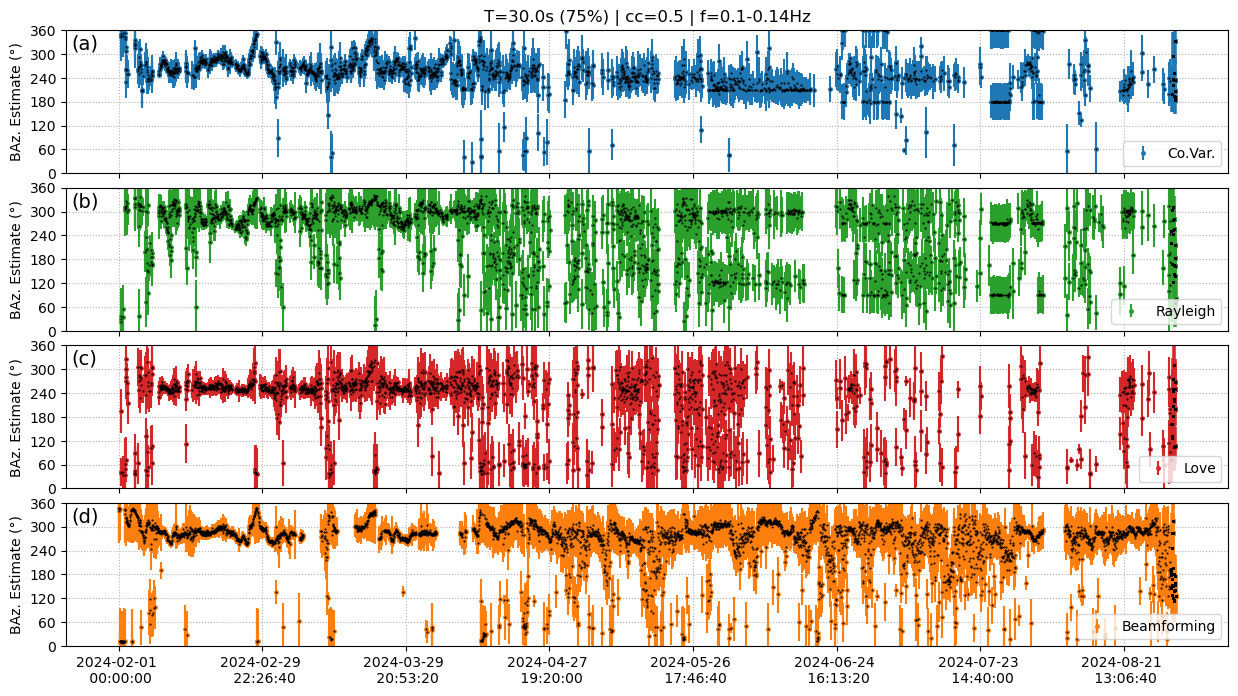

In [9]:
def __makeplot():

    Nrow, Ncol = 4, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    t_axis = df0.time_utc - config['tbeg']

    ms = 5

    alpha = 1.0
    ax[0].errorbar(t_axis, df0.baz_tangent, yerr=df0.baz_tangent_std/2,
                   fmt=".", color="tab:blue", ms=ms, label="Co.Var.", alpha=alpha
                  )
    ax[1].errorbar(t_axis, df0.baz_rayleigh, yerr=df0.baz_rayleigh_std/2,
                   fmt=".", color="tab:green", ms=ms, label="Rayleigh", alpha=alpha
                  )
    ax[2].errorbar(t_axis, df0.baz_love, yerr=df0.baz_love_std/2,
                   fmt=".", color="tab:red", ms=ms, label="Love", alpha=alpha
                  )
    ax[3].errorbar(t_axis, df0.baz_bf, yerr=df0.baz_bf_std/2,
                   fmt=".", color="tab:orange", ms=ms, label="Beamforming", alpha=alpha
                  )

    # std_min = 30
    # ax[0].errorbar(df0.time_utc[df0.baz_tangent_std < std_min] - config['tbeg'],
    #                df0.baz_tangent[df0.baz_tangent_std < std_min],
    #                yerr=df0.baz_tangent_std[df0.baz_tangent_std < std_min]/2,
    #                fmt=".", color="tab:blue", ms=ms, label="Co.Var."
    #               )
    # ax[1].errorbar(df0.time_utc[df0.baz_rayleigh_std < std_min] - config['tbeg'],
    #                df0.baz_rayleigh[df0.baz_rayleigh_std < std_min],
    #                yerr=df0.baz_rayleigh_std[df0.baz_rayleigh_std < std_min]/2,
    #                fmt=".", color="tab:green", ms=ms, label="Rayleigh"
    #               )
    # ax[2].errorbar(df0.time_utc[df0.baz_love_std < std_min] - config['tbeg'],
    #                df0.baz_love[df0.baz_love_std < std_min],
    #                yerr=df0.baz_love_std[df0.baz_love_std < std_min]/2,
    #                fmt=".", color="tab:red", ms=ms, label="Love"
    #               )
    # ax[3].errorbar(df0.time_utc[df0.baz_bf_std < std_min] - config['tbeg'],
    #                df0.baz_bf[df0.baz_bf_std < std_min],
    #                yerr=df0.baz_bf_std[df0.baz_bf_std < std_min]/2,
    #                fmt=".", color="tab:orange", ms=ms, label="Beamforming"
    #               )

    ax[0].errorbar(t_axis, df0.baz_tangent, yerr=0, fmt=".", color="k", ms=1)
    ax[1].errorbar(t_axis, df0.baz_rayleigh, yerr=0, fmt=".", color="k", ms=1)
    ax[2].errorbar(t_axis, df0.baz_love, yerr=0, fmt=".", color="k", ms=1)
    ax[3].errorbar(t_axis, df0.baz_bf, yerr=0, fmt=".", color="k", ms=1)



    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=4)
        ax[_n].set_ylim(0, 360)
        ax[_n].set_yticks(np.arange(0, 360+60, 60))
        ax[_n].set_ylabel("BAz. Estimate (°)")
        # ax[_n].set_xlim(left=0)

    # ax[Nrow-1].set_xlabel(f"Time (days) from {config['tbeg'].date} UTC", fontsize=font)

    ## add dates for x-axis
    ref_date = config['tbeg']
    tcks = ax[Nrow-1].get_xticks()
    tcklbls = [f"{UTCDateTime(UTCDateTime(ref_date)+t).date} \n {UTCDateTime(UTCDateTime(ref_date)+t).time}" for t in tcks]
    ax[Nrow-1].set_xticklabels(tcklbls)

    for _k, ll in enumerate(['(a)', '(b)', '(c)', '(d)']):
        ax[_k].text(.005, .97, ll, ha='left', va='top', transform=ax[_k].transAxes, fontsize=font+2)

    try:
        ax[0].set_title(config['title'])
    except:
        pass

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BAZ{config['project']}_timeline_{config['tbeg'].date}_{config['tend'].date}.png", format="png", dpi=150, bbox_inches='tight')


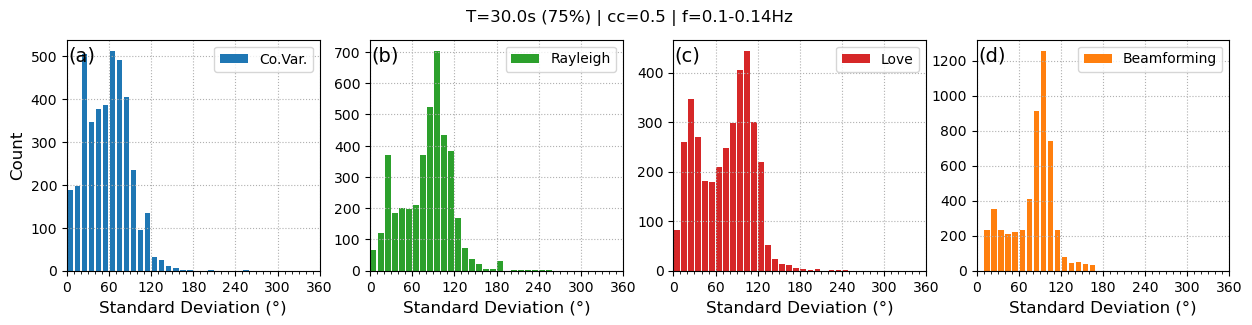

In [10]:
def __makeplot():

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    Nrow, Ncol = 1, 4

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 3), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    nbins = 36
    ax[0].hist(df0.baz_tangent_std, label="Co.Var.",
               bins=nbins, range=[0, 360], rwidth=0.8, color="tab:blue")
    ax[1].hist(df0.baz_rayleigh_std, label="Rayleigh",
               bins=nbins, range=[0, 360], rwidth=0.8, color="tab:green")
    ax[2].hist(df0.baz_love_std, label="Love",
               bins=nbins, range=[0, 360],rwidth=0.8, color="tab:red")
    ax[3].hist(df0.baz_bf_std, label="Beamforming",
               bins=nbins, range=[0, 360], rwidth=0.8, color="tab:orange")

    for _k, ll in enumerate(['(a)', '(b)', '(c)', '(d)']):
        ax[_k].text(.005, .97, ll, ha='left', va='top', transform=ax[_k].transAxes, fontsize=font+2)

        ax[_k].set_xlim(0, 360)
        ax[_k].grid(ls=":", zorder=0)
        ax[_k].legend(loc=1)
        ax[_k].set_xlabel("Standard Deviation (°)", fontsize=font)
        ax[_k].xaxis.set_minor_locator(MultipleLocator(10))
        ax[_k].xaxis.set_major_locator(MultipleLocator(60))

    ax[0].set_ylabel("Count", fontsize=font)

    try:
        plt.suptitle(config['title'])
    except:
        pass

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BAZ{config['project']}_timeline_{config['tbeg'].date}_{config['tend'].date}.png", format="png", dpi=150, bbox_inches='tight')


## Circular Plot

In [11]:
def circular_hist(ax, x, nbins=72, density=True, offset=0, gaps=True, weights=None):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        nbins = np.linspace(-np.pi, np.pi, num=nbins+1)

    # Bin data and record counts
    if weights is not None:
        n, bins = np.histogram(x, bins=nbins, range=(-np.pi, np.pi), weights=weights)
    else:
        n, bins = np.histogram(x, bins=nbins, range=(-np.pi, np.pi))

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=2, align='edge', width=widths,
                     edgecolor='darkred', fill=False, linewidth=0.7)

    # Set the direction of the zero angle
    # ax.set_theta_offset(offset)
    ax.set_theta_zero_location("N")  # theta=0 at the top

    ax.set_theta_direction(-1)  # theta increasing clockwise

    ax.grid(zorder=0)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [12]:
df_t = df0[['baz_tangent', 'baz_tangent_std']]
df_t.loc[:, 'wght'] = 1/df_t.baz_tangent_std
df_t = df_t.dropna()

df_l = df0[['baz_love', 'baz_love_std']]
df_l.loc[:, 'wght'] = 1/df_l.baz_love_std
df_l = df_l.dropna()

df_r = df0[['baz_rayleigh', 'baz_rayleigh_std']]
df_r.loc[:, 'wght'] = 1/df_r.baz_rayleigh_std
df_r = df_r.dropna()

df_b = df0[['baz_bf', 'baz_bf_std']]
df_b.loc[:, 'wght'] = 1/df_b.baz_bf_std
df_b = df_b.dropna()

/tmp/ipykernel_481867/662872037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.loc[:, 'wght'] = 1/df_t.baz_tangent_std
/tmp/ipykernel_481867/662872037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l.loc[:, 'wght'] = 1/df_l.baz_love_std
/tmp/ipykernel_481867/662872037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

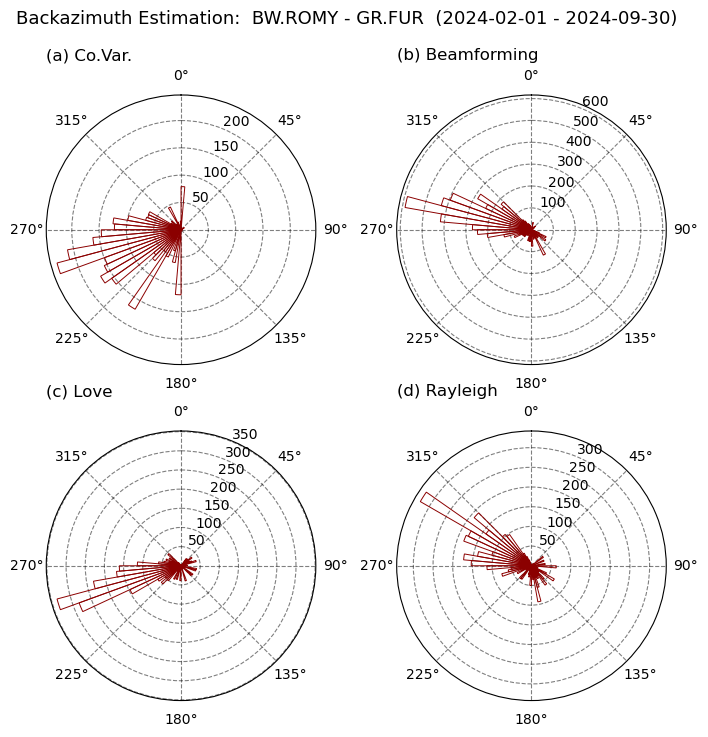

In [13]:
def __makeplot_polar(weight=False):

    import matplotlib.pyplot as plt
    import numpy as np

    font = 12

    # weight = False

    # Construct figure and axis to plot on
    fig, ax = plt.subplots(2, 2, subplot_kw=dict(projection='polar'), figsize=(8, 8))

    plt.subplots_adjust(wspace=0.3)

    if weight:
        circular_hist(ax[0,0], np.deg2rad(df_t.baz_tangent), weights=1/np.deg2rad(df_t.wght), density=True)
        circular_hist(ax[0,1], np.deg2rad(df_b.baz_bf), weights=1/np.deg2rad(df_b.wght), density=True)
        circular_hist(ax[1,0], np.deg2rad(df_l.baz_love), weights=1/np.deg2rad(df_l.wght), density=True)
        circular_hist(ax[1,1], np.deg2rad(df_r.baz_rayleigh), weights=1/np.deg2rad(df_r.wght), density=True)
    else:
        circular_hist(ax[0,0], np.deg2rad(df_t.baz_tangent), density=False)
        circular_hist(ax[0,1], np.deg2rad(df_b.baz_bf), density=False)
        circular_hist(ax[1,0], np.deg2rad(df_l.baz_love), density=False)
        circular_hist(ax[1,1], np.deg2rad(df_r.baz_rayleigh), density=False)

    ax[0,0].set_title("(a) Co.Var.", loc="left")
    ax[0,1].set_title("(b) Beamforming", loc="left")
    ax[1,0].set_title("(c) Love", loc="left")
    ax[1,1].set_title("(d) Rayleigh", loc="left")

    for i in range(2):
        for j in range(2):
            ax[i, j].grid(color="k", zorder=0, ls="--", alpha=0.5)

    plt.suptitle(f"Backazimuth Estimation:  BW.ROMY - GR.FUR  ({config['tbeg'].date} - {config['tend'].date})", fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot_polar(weight=False)

# fig.savefig(config['path_to_figs']+f"BAZ{config['project']}_polar_{config['tbeg'].date}_{config['tend'].date}.png", format="png", dpi=150, bbox_inches='tight')


## Map Plot

In [14]:
def __load_bathymetry(path_to_data, box=(-180, -90, 180, 90)):

    from numpy import array
    from glob import glob
    import cartopy.io.shapereader as shpreader
    import matplotlib

    # Read shapefiles, sorted by depth
    shp_dict = {}
    files = glob(path_to_data+'*.shp')

    files.sort()

    depths = []
    for f in files:
        depth = '-' + f.split('_')[-1].split('.')[0]  # depth from file name
        depths.append(depth)
        bbox = box  # (x0, y0, x1, y1)
        nei = shpreader.Reader(f, bbox=bbox)
        shp_dict[depth] = nei

    depths_str = array(depths)[::-1]  # sort from surface to bottom

    # Construct a discrete colormap with colors corresponding to each depth
    depths = depths_str.astype(int)
    N = len(depths)
    nudge = 0.01  # shift bin edge slightly to include data
    boundaries = [min(depths)] + sorted(depths+nudge)  # low to high
    norm = matplotlib.colors.BoundaryNorm(boundaries, N)
    blues_cm = matplotlib.colormaps['Blues_r'].resampled(N)
    colors_depths = blues_cm(norm(depths))

    out = {}
    out['depths'] = depths
    out['shp_dict'] = shp_dict
    out['colors_depths'] = colors_depths
    out['blues_cm'] = blues_cm
    out['depths_str'] = depths_str
    out['norm'] = norm

    return out

In [15]:
box = [config['romy_lon']-40, config['romy_lon']+40, config['romy_lat']-40, config['romy_lat']+40]

out_bath = __load_bathymetry(config['path_to_bathy_data'], (box[0], box[2], box[1], box[3]))


In [16]:
def __makeplot_maps(weights=True, density=False):

    import gc
    import matplotlib.colors
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import matplotlib.pyplot as mpl
    import cartopy.feature as cfeature

    romy_lon = 11.275501
    romy_lat = 48.162941

    flatMap = ccrs.PlateCarree()

    resolution = '50m'

    box = [romy_lon-40, romy_lon+40, romy_lat-40, romy_lat+40]

    ## load bathymetry data
    out_bath = __load_bathymetry(config['path_to_bathy_data'], (box[0], box[2], box[1], box[3]))

    font = 12

    fig = plt.figure(figsize=(10, 10), dpi=96)

    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    ## ________________________________________________
    ## CoVar

    ax0 = fig.add_subplot(221, projection=flatMap)

    ax0.imshow(np.tile(np.array([[cfeature.COLORS['water'] * 255]], dtype=np.uint8), [2, 2, 1]),
              origin='upper',
              transform=ccrs.PlateCarree(),
              extent=box
             )

    # ax0.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor="lightgrey"))

    ax00 = fig.add_subplot(221, projection='polar')

    if weights:
        circular_hist(ax00, np.deg2rad(df_t.baz_tangent), weights=1/np.deg2rad(df_t.wght), density=density)
    else:
        circular_hist(ax00, np.deg2rad(df_t.baz_tangent), density=density)

    ax00.patch.set_alpha(0.)
    ax00.grid(color="k", ls="--", alpha=0.5)

    ## plot bathymetry
    for i, _depth_str in enumerate(out_bath['depths_str']):
        ax0.add_geometries(out_bath['shp_dict'][_depth_str].geometries(),
                           crs=ccrs.PlateCarree(),
                           color=out_bath['colors_depths'][i]
                           )

    sm = plt.cm.ScalarMappable(cmap=out_bath['blues_cm'], norm=out_bath['norm'])
    ax0.set_rasterized(True)

    ax0.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', lw=0.5, facecolor="lightgrey"))
    # ax0.add_feature(cfeature.LAND, color='grey')
    ax0.coastlines(lw=0.5, resolution=resolution)
    ax0.set_rasterized(True)


    ## ________________________________________________
    ## Beamforming

    ax1 = fig.add_subplot(222, projection=flatMap)

    ax1.imshow(np.tile(np.array([[cfeature.COLORS['water'] * 255]], dtype=np.uint8), [2, 2, 1]),
              origin='upper',
              transform=ccrs.PlateCarree(),
              extent=box
             )

    # ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor="lightgrey"))


    ax01 = fig.add_subplot(222, projection='polar')

    if weights:
        circular_hist(ax01, np.deg2rad(df_b.baz_bf), weights=1/np.deg2rad(df_b.wght), density=density)
    else:
        circular_hist(ax01, np.deg2rad(df_b.baz_bf), density=density)

    ax01.patch.set_alpha(0.)
    ax01.grid(color="k", ls="--", alpha=0.5)

    ## plot bathymetry
    for i, _depth_str in enumerate(out_bath['depths_str']):
        ax1.add_geometries(out_bath['shp_dict'][_depth_str].geometries(),
                           crs=ccrs.PlateCarree(),
                           color=out_bath['colors_depths'][i]
                           )

    sm = plt.cm.ScalarMappable(cmap=out_bath['blues_cm'], norm=out_bath['norm'])
    ax1.set_rasterized(True)

    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', lw=0.5, facecolor="lightgrey"))
    # ax1.add_feature(cfeature.LAND, color='grey')
    ax1.coastlines(lw=0.5, resolution=resolution)
    ax1.set_rasterized(True)


    ## ________________________________________________
    ## Love

    ax2 = fig.add_subplot(223, projection=flatMap)

    ax2.imshow(np.tile(np.array([[cfeature.COLORS['water'] * 255]], dtype=np.uint8), [2, 2, 1]),
              origin='upper',
              transform=ccrs.PlateCarree(),
              extent=box
             )

    # ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor="lightgrey"))

    ax02 = fig.add_subplot(223, projection='polar')

    if weights:
        circular_hist(ax02, np.deg2rad(df_l.baz_love), weights=1/np.deg2rad(df_l.wght), density=density)
    else:
        circular_hist(ax02, np.deg2rad(df_l.baz_love), density=density)

    ax02.patch.set_alpha(0.)
    ax02.grid(color="k", ls="--", alpha=0.5)


    ## plot bathymetry
    for i, _depth_str in enumerate(out_bath['depths_str']):
        ax2.add_geometries(out_bath['shp_dict'][_depth_str].geometries(),
                           crs=ccrs.PlateCarree(),
                           color=out_bath['colors_depths'][i]
                           )

    sm = plt.cm.ScalarMappable(cmap=out_bath['blues_cm'], norm=out_bath['norm'])
    ax2.set_rasterized(True)

    ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', lw=0.5, facecolor="lightgrey"))
    # ax2.add_feature(cfeature.LAND, color='grey')
    ax2.coastlines(lw=0.5, resolution=resolution)
    ax2.set_rasterized(True)


    ## ________________________________________________
    ## Rayleigh

    ax3 = fig.add_subplot(224, projection=flatMap)


    ax3.imshow(np.tile(np.array([[cfeature.COLORS['water'] * 255]], dtype=np.uint8), [2, 2, 1]),
              origin='upper',
              transform=ccrs.PlateCarree(),
              extent=box
             )

    # ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor=cfeature.COLORS['land']))
    # ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor="lightgrey"))

    ax03 = fig.add_subplot(224, projection='polar')

    if weights:
        circular_hist(ax03, np.deg2rad(df_r.baz_rayleigh), weights=1/np.deg2rad(df_r.wght), density=density)
    else:
        circular_hist(ax03, np.deg2rad(df_r.baz_rayleigh), density=density)



    ax03.patch.set_alpha(0.)
    ax03.grid(color="k", ls="--", alpha=0.5)

    ## plot bathymetry
    for i, _depth_str in enumerate(out_bath['depths_str']):
        ax3.add_geometries(out_bath['shp_dict'][_depth_str].geometries(),
                           crs=ccrs.PlateCarree(),
                           color=out_bath['colors_depths'][i]
                           )

    sm = plt.cm.ScalarMappable(cmap=out_bath['blues_cm'], norm=out_bath['norm'])
    ax3.set_rasterized(True)

    ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', lw=0.5, facecolor="lightgrey"))
    # ax3.add_feature(cfeature.LAND, color='grey')
    ax3.coastlines(lw=0.5, resolution=resolution)
    ax3.set_rasterized(True)



    ax0.set_title("(a) Co-Variance", pad=15, loc="left", fontsize=font)
    ax1.set_title("(b) Beamforming", pad=15, loc="left", fontsize=font)
    ax2.set_title("(c) Love waves", pad=15, loc="left", fontsize=font)
    ax3.set_title("(d) Rayleigh waves", pad=15, loc="left", fontsize=font)

    plt.suptitle(f"Backazimuth Estimation:  BW.ROMY - GR.FUR  ({config['tbeg'].date} - {config['tend'].date})", fontsize=font+1, y=0.95)

    gc.collect()

    plt.show();
    return fig

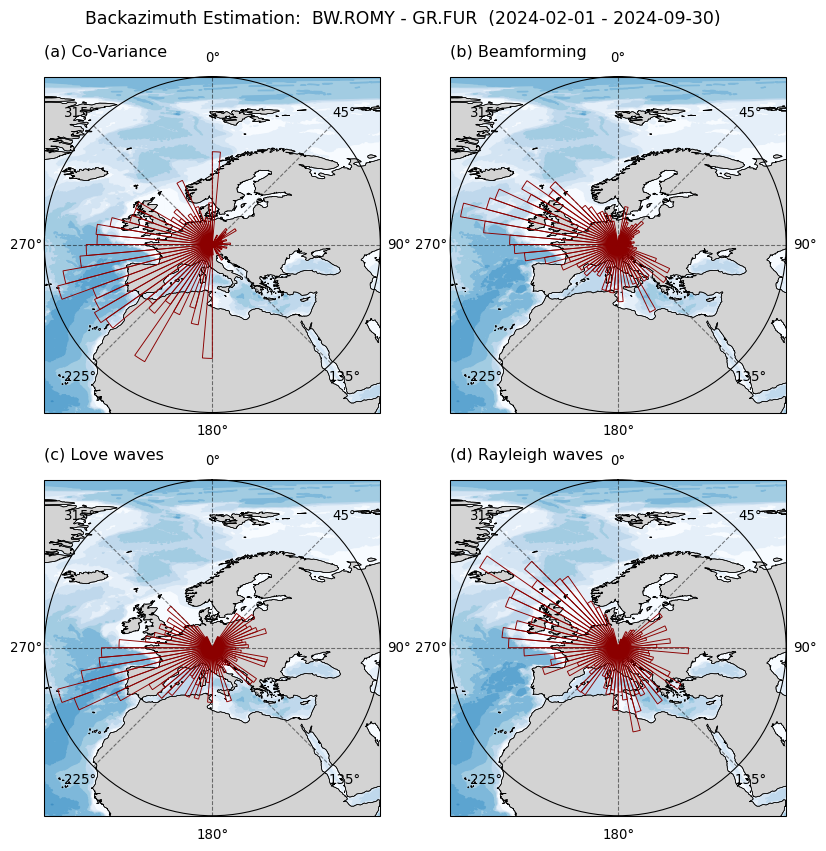

In [17]:
density = True

fig = __makeplot_maps(weights=False, density=density)

if density:
    fig.savefig(config['path_to_figs']+f"BAZ{config['project']}_maps_{config['tbeg'].date}_{config['tend'].date}_density.png", format="png", dpi=150, bbox_inches='tight')
else:
    fig.savefig(config['path_to_figs']+f"BAZ{config['project']}_maps_{config['tbeg'].date}_{config['tend'].date}.png", format="png", dpi=150, bbox_inches='tight')
